<a href="https://colab.research.google.com/github/saadaminj/Face-Verification-Facenet/blob/master/Facenet%20face%20verification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# example of loading the keras facenet model
from keras.models import load_model
# load the model
model = load_model('facenet_keras.h5')
model.load_weights('facenet_keras_weights.h5')
# summarize input and output shape
print(model.inputs)
print(model.outputs)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


[<tf.Tensor 'input_1:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/cond/Identity:0' shape=(None, 128) dtype=float32>]


In [ ]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import mtcnn
print(mtcnn.__version__)

0.1.0


In [ ]:
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN

def extract_face(image, required_size=(160, 160)):
  pixels = np.asarray(image)
  detector = MTCNN()
  results = detector.detect_faces(pixels)
  x1, y1, width, height = results[0]['box']
  x1, y1 = abs(x1), abs(y1)
  x2, y2 = x1 + width, y1 + height
  face = pixels[y1:y2, x1:x2]
  image = Image.fromarray(face)
  image = image.resize(required_size)
  face_array = asarray(image)
  return face_array

In [ ]:
def verify(img1,img2,identity,alpha=0.7):
  dist = np.linalg.norm(img2-img1)
  if dist<alpha:
      print("It's " + str(identity) + ", welcome in!")
      door_open = True
  else:
      print("It's not " + str(identity) + ", please go away")
      door_open = False
  return dist, door_open

In [ ]:
from PIL import Image
import numpy as np
def resize(img):
  basewidth = 160
  wpercent = (basewidth/float(img.size[0]))
  hsize = int((float(img.size[0])*float(wpercent)))
  img = img.resize((basewidth,hsize), Image.ANTIALIAS)
  img.show()
  img.size
  img = np.array(img).reshape(-1,160,160, 3)
  return img

In [ ]:
from matplotlib import image
from matplotlib import pyplot
from sklearn import preprocessing

def import_image(filename):
  img = Image.open(filename,mode='r')
  img = resize(img)
  img_face = extract_face(img[0])
  pyplot.imshow(img_face)
  pyplot.show()
  return model.predict(np.resize(img_face,[1,160,160,3]))[0]

In [ ]:
def transform(face_pixels):
  # scale pixel values
  face_pixels = face_pixels.astype('float32')
  # standardize pixel values across channels (global)
  mean, std = face_pixels.mean(), face_pixels.std()
  face_pixels = (face_pixels - mean) / std
  return face_pixels

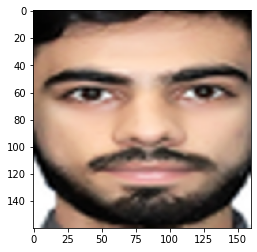

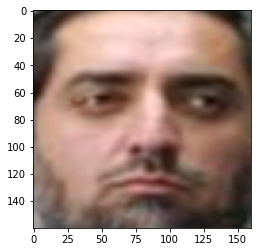

It's not saad, please go away


(8.567945, False)

In [ ]:
img1 = import_image("2.jpg")
img2 = import_image("4.jpg")

#img1 = preprocessing.normalize(np.reshape(img1,[1, -1]))
#img2 = preprocessing.normalize(np.reshape(img2,[1, -1]))

img1 = transform(img1)
img2 = transform(img2)

verify(img1, img2, "saad",6)